In [1]:
import numpy as np
import matplotlib.pyplot as plt 

#### Solution to problem (1)

* Assumming that $\hat{y}_i$'s are distributed with mean $\mu$ and variance $\sigma_{\hat{y}_i}^2$
\begin{align}
\sigma_{\hat{y}_i}^2 &= Var(\frac{1}{B}\sum_{i=1}^{B}\hat{y}_i)\\
                     &= \frac{1}{B^2}\left(E[(\sum_{i=1}^{B}\hat{y}_i)^2] -         E[(\sum_{i=1}^{B}\hat{y}_i)]^2\right)
\end{align}
* Part I, we have

\begin{align}
E[(\sum_{i=1}^{B}\hat{y}_i)]^2 &= (\sum_{i=1}^{B}E[\hat{y}_i])^2\\
&= B^2\mu^2
\end{align}

* Part II, we have:
\begin{align}
E[(\sum_{i=1}^{B}\sum_{j=1}^{B}\hat{y}_i\hat{y}_j)] &= \sum_{i=1}^{B}\sum_{j=1}^{B}E[\hat{y}_i\hat{y}_j]\\
&= (B^2-B)\,E[\hat{y}_i\hat{y}_j] + B\, E[\hat{y}_i^2]
\end{align}

* Part II continues:

\begin{align}
E[\hat{y}_i\hat{y}_j] &= 
\begin{cases}
E[\hat{y}_i]\,E[\hat{y}_j] + cov(\hat{y}_i,\hat{y}_j)&\mbox{if i =j}\\
E[\hat{y}_i]\,E[\hat{y}_j] + var(\hat{y}_i)&\mbox{if i !=j}
\end{cases}\\
&= \begin{cases}
\mu^2 + \rho\sigma_{\hat{y}_i}&\mbox{if i =j}\\
\mu^2 + \sigma_{\hat{y}_i}&\mbox{if i !=j}
\end{cases}\\
\end{align}

* Part III, summary:
\begin{align}
\sigma_{\hat{y}_i}^2 &= \frac{1}{B^2}\left((B^2-B)\,(\mu^2 + \rho\sigma_{\hat{y}_i}^2) +B\,(\mu^2 + \sigma_{\hat{y}_i}^2) - B^2\mu^2\right)\\
&=\rho\sigma_{\hat{y}_i}^2 + \frac{1-\rho}{B}\sigma_{\hat{y}_i}^2\\\\
\end{align}

In [2]:
# Problem 2


def generate_test_data(N,noise = 100):
    x = np.random.randn(N, 5)
    y = np.where(x[:, 0] > 0, 2, 5)
    y = y + np.where(x[:, 1] > 0, -3, 3)
    y = y + np.where(x[:, 2] > 0, 0, 0.5)
    y = y + np.random.randn(N)*noise
    return x,y

class TreeNode:
    def predict(x, y):
        assert False

    def depth(self):
        assert False

class BranchNode(TreeNode):
    def __init__(self, left, right, split_var_index, split_var_value):
        self.left = left
        self.right = right
        self.split_var_index = split_var_index
        self.split_var_value = split_var_value

    def predict(self, x):
        
        svar = x[:, self.split_var_index]
        is_left = svar < self.split_var_value
        leftx = x[is_left]
        rightx = x[~is_left]

        rv = np.zeros(x.shape[0])
        rv[is_left] = self.left.predict(leftx)
        rv[~is_left] = self.right.predict(rightx)

        return rv

    def depth(self):
        return 1 + max(self.left.depth(), self.right.depth())

class LeafNode(TreeNode):
    def __init__(self, mu):
        self.mu = mu

    def predict(self, x):
        return np.repeat(self.mu, x.shape[0])

    def depth(self):
        return 1


def pre_process(X,Y,num_folds):
    """
    spliting data into bins
    
    commend in the line with *** to random shuffle data before CV
    randomly shuffle X and Y correspondly
    return shuffled X,y and k folds of Xk's and Yk's
    """
    
    #*****shuffle_seed = 1
    
    #*****np.random.seed(shuffle_seed )
    #*****np.random.shuffle(X)
    x_blocks = np.array_split(X,num_folds)
    
    #keep shuffled data in order
    #*****np.random.seed(shuffle_seed )
    #*****np.random.shuffle(Y)
    y_blocks = np.array_split(Y,num_folds)
    
    #get the training sets in CV
  
 
    return X,Y,x_blocks,y_blocks


def cal_validate_sse(left_u,right_u,x_validate,y_validate,spit_val):
    
    """
    Calculate SSE when doing cross validation
    """
    is_left   = x_validate < spit_val
    
    y_left_du   = y_validate[is_left] - left_u
    y_right_du  = y_validate[~is_left]- right_u
  
    
    return  (y_left_du.dot(y_left_du.T)) +  y_right_du.dot(y_right_du.T)
    
    
    
    
    

In [56]:
class RegressionTree:
    def __init__(self, max_depth, min_points_in_leaf,num_cv_folds=1):
        self.max_depth = max_depth
        self.min_points_in_leaf = min_points_in_leaf
        self.num_cv_folds = num_cv_folds

    def predict(self, x):
        assert self.fitted
        return self.root.predict(x)

    def fit(self, x, y):
        self.fitted = True
        self.root = self.fit_internal(x, y, 1)

    def fit_internal(self, x, y, current_depth):
        
        # implement this
        num_features = x.shape[1]
        num_rows = x.shape[0]
        var_orig = np.var(y)
        y_demean = y - np.mean(y)
        sse_orig = y_demean.dot(y_demean.T) 
        if current_depth == self.max_depth:
            return LeafNode(np.mean(y))

        best_variable = None

        # Here, we have to loop over all features and figure out which one
        # might be splittable, and if it is, how to split it to maximize Variance Reduction
        
        #if we are using cross validation, we should use SSE instead of var
        var_min = var_orig if self.num_cv_folds ==1 else sse_orig
       
        #choose feature
        for i in range(num_features):
            svar_tmp = x[:, i]
            length_i = len(svar_tmp)
            
            
            #chose spit value
            for j in range(1,5):
                
                split_tmp = min(svar_tmp) + j*(max(svar_tmp)-min(svar_tmp))/(5*1.0)
                
                is_left_tmp = svar_tmp < split_tmp
                lefty_tmp = y[is_left_tmp]
                righty_tmp = y[~is_left_tmp]
                if min(len(lefty_tmp),len(righty_tmp)) < self.min_points_in_leaf:
                    continue
                    
                   
                """
                Without cross validation
                """
                if self.num_cv_folds ==1:
                    w_j = (len(lefty_tmp)*1.0)/(length_i*1.0)
                    sub_var_tmp = w_j*np.var(lefty_tmp)\
                                  + (1-w_j)*np.var(righty_tmp)
                        
                        
                """
                with cross validation
                """
                
                
                if self.num_cv_folds !=1:
                    c_error = 0
                    x,y,x_blocks,y_blocks = pre_process(x,y,self.num_cv_folds)
                    for k in range(self.num_cv_folds):
                        x_train = (np.vstack([fold for index,fold in enumerate(x_blocks) if index != k]))
                        y_train = (np.concatenate([fold for index,fold in enumerate(y_blocks) if index != k ]))
                        #set the validate set
                        x_validate = x_blocks[k]
                        y_validate = y_blocks[k]

                        is_left_train = x_train[:,i] < split_tmp

                        lefty_train = y_train[is_left_train]
                        righty_train= y_train[~is_left_train]

                        c_error += cal_validate_sse(np.mean(lefty_train),np.mean(righty_train),\
                                                        x_validate[:,i],y_validate,split_tmp)
                        
                    sub_var_tmp = c_error
                    
                # update with the largest variace reduction   
                if sub_var_tmp < var_min:
                    var_min = sub_var_tmp
                    best_variable = [i,split_tmp]
                    
                    
                    
                    

        if best_variable is None:
            return LeafNode(np.mean(y))
        
        else:
            #bisec the dataset 
            #print("new SSE:", var_min,best_variable)
            feature_chosen = x[:,best_variable[0]]
            is_left_chosen = feature_chosen < best_variable[1]
            leftx_chosen  = x[is_left_chosen]
            rightx_chosen = x[~is_left_chosen]
            lefty_chosen  = y[is_left_chosen]
            righty_chosen = y[~is_left_chosen]
            
           
            
            
            
            # get the left and right childs
            #constructe the parent node
            
            #print("build left",np.var(lefty_chosen))
            left_child  = self.fit_internal(leftx_chosen, lefty_chosen, current_depth + 1)
            #print("new SSE:", var_min,best_variable)
            #print("build right")
            right_child = self.fit_internal(rightx_chosen, righty_chosen, current_depth + 1)
            
            return BranchNode(left_child,right_child,best_variable[0],best_variable[1])

    def depth(self):
        return self.root.depth()

In [63]:
np.random.seed(1314)
x_in, y_in = generate_test_data(50000,10)

x_out, y_out = generate_test_data(50000,10)

n = 10
max_depth = np.array([2*i+1 for i in range(n)])

# without cross validation

r2_in     = np.zeros(n)
r2_out    = np.zeros(n)
r2_in_cv  = np.zeros(n)
r2_out_cv = np.zeros(n)

for i in range(n):
    
    tree = RegressionTree(max_depth[i], 100)
    tree.fit(x_in, y_in)
    y_hat_demean = tree.predict(x_in) - y_in
    y_demean = y_in - np.mean(y_in)
    r2_in[i]  = 1 - y_hat_demean.dot(y_hat_demean.T)/ y_demean.dot(y_demean.T)
    y_hat_demean = tree.predict(x_out) - y_out
    y_demean = y_out - np.mean(y_out)
    r2_out[i] = 1 - y_hat_demean.dot(y_hat_demean.T)/ y_demean.dot(y_demean.T)
    
    tree_cv = RegressionTree(max_depth[i], 100, 10)
    tree_cv.fit(x_in, y_in)
    y_hat_demean = tree_cv.predict(x_in) - y_in
    y_demean = y_in - np.mean(y_in)
    r2_in_cv[i]  =  1 - y_hat_demean.dot(y_hat_demean.T)/ y_demean.dot(y_demean.T)
    
    y_hat_demean = tree_cv.predict(x_out) - y_out
    y_demean = y_out - np.mean(y_out)
    r2_out_cv[i] = 1 - y_hat_demean.dot(y_hat_demean.T)/ y_demean.dot(y_demean.T)

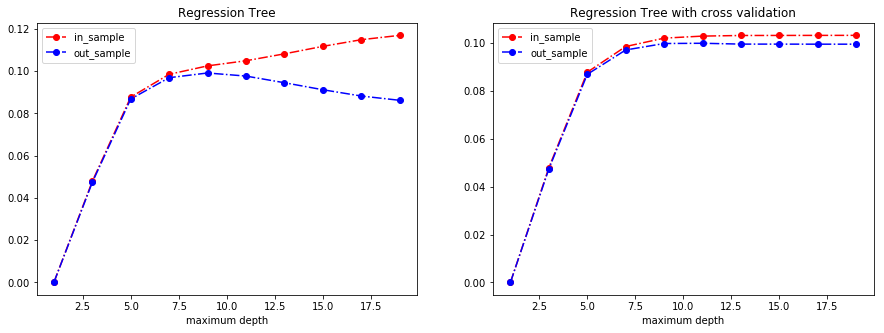

In [64]:
%matplotlib inline
fig = plt.figure(figsize=(15,5))
figure1 = fig.add_subplot(121)
figure2 = fig.add_subplot(122)

figure1.plot(max_depth, r2_in, 'ro', ls='dashdot', label='in_sample')
figure1.plot(max_depth, r2_out, 'bo', ls='dashdot', label='out_sample')



figure2.plot(max_depth, r2_in_cv, 'ro', ls='dashdot', label='in_sample')
figure2.plot(max_depth, r2_out_cv, 'bo', ls='dashdot', label='out_sample')

figure1.set_xlabel("maximum depth")
figure2.set_xlabel("maximum depth")

figure1.legend()
figure2.legend()

figure1.set_title("Regression Tree")
figure2.set_title("Regression Tree with cross validation")
